<p style="background-color:Brown;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
[1. DATASET DETAILS](#1)    
[2. BUSINESS PROBLEM STATEMENTS](#2)  
[3. IMPORT IMPORTANT LIBRARY](#3)   
[4. LOADING DATA](#4)   
[5. INITIAL DATA EXPLORATION](#5) 

[6. DATA CLEANING](#6)      
[7. EXPLORATORY DATA ANALYSIS](#7)   
[8. DATA ANALYSIS](#8)   
[9. MACHINE LEARNING MODEL](#9)   
[10. CONCLUSION](#10)   


# <p style="background-color:brown;font-family:newtimeroman;color:white;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>
customer segementation simply means grouping your customer according to various characteristics such as age,gender,martial status etc. It's a way for organization to understand their customer. knowing the difference between customer groups,it's eaiser to make strategic decision regarding product growth and marking.
There are different methodolgies for customer segmentation, are they depend on four types of parameter:

`Geographic`-It's customer segmentation is very simple, it's all about the user's location.You can group by country,state,city or zip code.

`Demographic`-It's customer segmentation related to the structure,size and movements of customer over the space and time.You can group by age,martial status,gender etc.

`Behavioral`-It's customer segmentation is based on past observed behaviors of customer that can used for predict future action.

`Psychlogical`-It's customer segmentation is generally deals with things like personality traits, attitude or belief.This data is obtained using customer surveys,and it can be used to gauge customer sentiment.    

# <p style="background-color:brown;font-family:newtimeroman;color:white;font-size:150%;text-align:center;border-radius:10px 10px;">Why Segment Customers?</p>
*   Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
*   Identify ways to improve products or new product or service opportunities.
*   Establish better customer relationships.
*   Test pricing options.
*   Focus on the most profitable customers.
*   Improve customer service.
*   Upsell and cross-sell other products and services.

<a id="1"></a>

# <p style="background-color:brown;font-family:newtimeroman;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">DataSet Details</p>

| Feature         | Description     | Values |
|--------------|-----------|------------|
| ID | Id of customer | 1,2,3,4,... |
| Gender | Gender of the customer  | (Male & Female) |
| Ever_Married |  Marital status of the customer | (Yes & No) |
| Age | Age of the customer | 10,20, 25, 40,.... |
| Graduated | Is the customer a graduate? | (Yes & No) | 
| Profession |Profession of the customer | (Artist, Healthcare,Doctor, Engineer, Lawyer, etc) |
| Work_Experience |  Work Experience |  (1:10) |
| Spending_Score | Spending score of the customer | (Low, Average, High) |
| Family_Size | Number of family members for the customer (including the customer)  | 1,5,2,.. |
| Var_1 | Variable  | (Cat_1, Cat_2, Cat_3, Cat_4) |

  ---


<a id="2"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">Business Problem Statement</p>
*  Our retail company wants to improve customer retention and increase revenue by develop targeted marketing strategies for different customer segments based on their purchasing behavior and demographic.

<a id="3"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">Importing Library</p>

In [1399]:
import pandas as pd                 # it is allows various data manipulation such as merging,reshaping as well as data cleaning
import numpy as np                  # It is basic level external library in python used for complex mathematical operation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

<a id="4"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">Load the data with the help of pandas</p>

In [1400]:
train=pd.read_csv("D:\My Project\Python Project\project_task\Customer Segmentation\Train.csv")
train.drop(['ID','Var_1'],axis=1, inplace=True)

<a id="5"></a>
# <p style="background-color:brown;font-family:Arial;font-size:110%;color:white;text-align:center;border-radius:20px 20px;">Initial Data Exploration</p>

In [1401]:
#first 5 starting rows
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [1402]:
#first 5 ending rows
train.tail()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B
8067,Male,Yes,37,Yes,Executive,0.0,Average,3.0,B


In [1403]:
# structure of dataset
train.shape

(8068, 9)

In [1404]:
# column names of dataset
train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [1405]:
# Information about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


* According to information about dataset to show some null values in `Ever_Married`,`Graduated`,`Profession`,`Work_Experience` and `Family_Size` Columns

In [1406]:
# Summary of dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0


In [1407]:
# To find the unique value in numerical columns
for colu in train.describe().columns:
    print(colu,':')
    print(train[colu].unique())
    print('_'*40)

Age :
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
________________________________________
Work_Experience :
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
________________________________________
Family_Size :
[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
________________________________________


In [1408]:
train.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Segmentation
count,8068,7928,7990,7944,8068,8068
unique,2,2,2,9,3,4
top,Male,Yes,Yes,Artist,Low,D
freq,4417,4643,4968,2516,4878,2268


In [1409]:
# To find the unique value in Categorical columns
for colum in train.describe(include='object').columns:
    print(colum,':')
    print(train[colum].unique())
    print('_'*40)

Gender :
['Male' 'Female']
________________________________________
Ever_Married :
['No' 'Yes' nan]
________________________________________
Graduated :
['No' 'Yes' nan]
________________________________________
Profession :
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
________________________________________
Spending_Score :
['Low' 'Average' 'High']
________________________________________
Segmentation :
['D' 'A' 'B' 'C']
________________________________________


<a id="6"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:110%;text-align:center;border-radius:20px 20px;">Data Cleaning</p>

# <p style="color:Grey;font-weight:bold;">Rename the Columns</p>

In [1410]:
# Rename the Ever_Married and Graduated Columns
train=train.rename(columns={'Ever_Married':'Married_Status','Graduated':'Graduation_Status','Segmentation':'Product_Segment'})

# <p style="color:Grey;font-weight:bold;"> Handling Missing Value</p>

In [1411]:
#show the null values
train.isnull().sum()

Gender                 0
Married_Status       140
Age                    0
Graduation_Status     78
Profession           124
Work_Experience      829
Spending_Score         0
Family_Size          335
Product_Segment        0
dtype: int64

In [1412]:
# Removing Null Values in Given numerical columns
train['Work_Experience'].fillna(train['Work_Experience'].mean(),inplace=True)
train['Family_Size'].fillna(train['Family_Size'].mean(),inplace=True)

In [1413]:
# Removing All Null Values in Given dataset
train=train.dropna()

In [1414]:
train.isnull().sum()

Gender               0
Married_Status       0
Age                  0
Graduation_Status    0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size          0
Product_Segment      0
dtype: int64

In [1415]:
train.head()

,Gender,Married_Status,Age,Graduation_Status,Profession,Work_Experience,Spending_Score,Family_Size,Product_Segment
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,A


* `Work_Experience` Column after decimal 6 number,so it is see very odd then to set the decimal zerores 
* `Family_Size` column change the data type 

In [1416]:
# To Set the decimal zeores in Work_Experience Columns
s=train['Work_Experience']
formate=[f"{v:.1f}" 
         for v in s]
train['Work_Experience']=formate


# To Change the data type of Family_Size column
train['Family_Size']=train['Family_Size'].astype('int64')
train['Work_Experience']=train['Work_Experience'].astype(float)

In [1417]:
train.head()

,Gender,Married_Status,Age,Graduation_Status,Profession,Work_Experience,Spending_Score,Family_Size,Product_Segment
0,Male,No,22,No,Healthcare,1.0,Low,4,D
1,Female,Yes,38,Yes,Engineer,2.6,Average,3,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2,B
4,Female,Yes,40,Yes,Entertainment,2.6,High,6,A


# <p style="color:Grey;font-weight:bold;">Handling Outliers</p>

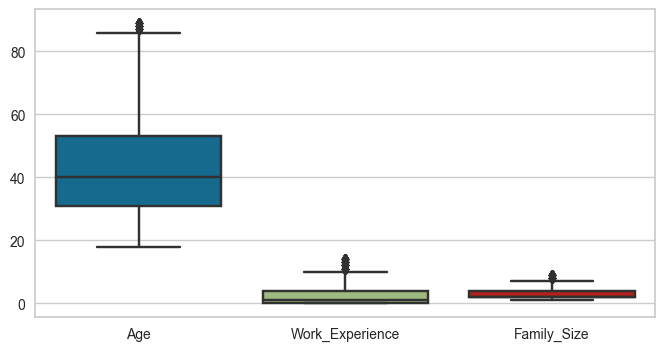

In [1418]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train)
plt.show()

In [1419]:
#Dropping the outliers by setting a cap on Age and income. 
train = train[(train["Age"]<81)]
train = train[(train["Family_Size"]<7)]
train = train[(train["Work_Experience"]<7)]
print("The total number of data-points after removing the outliers are:", len(train))

The total number of data-points after removing the outliers are: 5992


<a id="7"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:150%;text-align:center;border-radius:20px 20px;">Exploratory Data Analysis</p>

<a id="6"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:100%;text-align:center;border-radius:20px 20px;">Explore Variable</p>

# Visualize the distribution of a numerical variable by Histogram

<a id="6"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:80%;text-align:center;border-radius:10px 10px;">Age</p>

In [1420]:
a=train['Age'].min()
b=train['Age'].max()
print("Min Age of Customer is:",a)
print("Max Age of Customer is:",b)

Min Age of Customer is: 18
Max Age of Customer is: 80


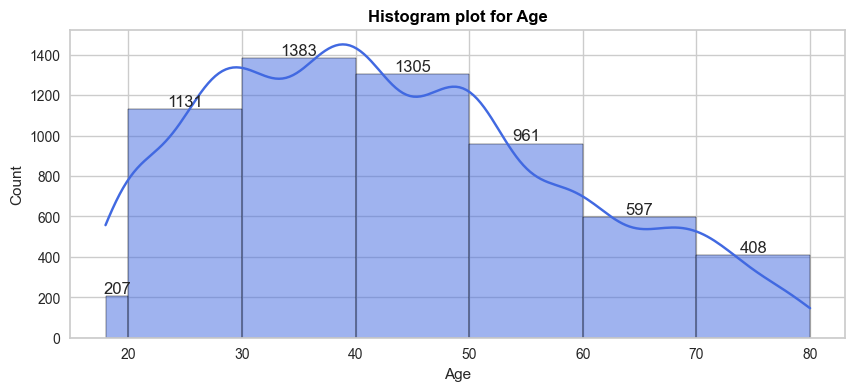

In [1421]:
# creating bins for age
c1=[18,20,30,40,50,60,70,80]

plt.subplots(figsize=(10,4))
ax=sns.histplot(data=train,x='Age',bins=c1,kde=True,color='Royalblue')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram plot for Age',fontsize = 12, fontweight='bold', color='black')
plt.show()

Interpretation:-
* the mean is greater than standard deviation so, distribution is skewed to the `right`.
* the customer with age group between `30-40` are more than the age group between `40-50` and `20-30`.this, means maximum customer age is 30-40Yr

<a id="6"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:80%;text-align:center;border-radius:10px 10px;">Work-Experience</p>

In [1422]:
a2=train['Work_Experience'].min()
b2=train['Work_Experience'].max()
print("Min Work_Experience of Customer is:",a2)
print("Max Work_Experience of Customer is:",b2)

Min Work_Experience of Customer is: 0.0
Max Work_Experience of Customer is: 6.0


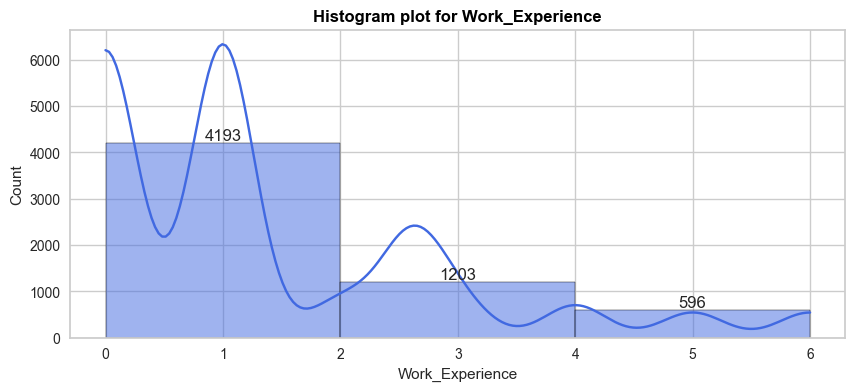

In [1423]:
# creating bins for work experience
c2=[0,2,4,6]

plt.subplots(figsize=(10,4))
ax=sns.histplot(data=train,x='Work_Experience',bins=c2,kde=True,color='Royalblue')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram plot for Work_Experience',fontsize = 12, fontweight='bold', color='black')
plt.show()

Interpretation:-
* the mean is less than standard deviation so, distribution is skewed to the `left`.
* the customer with work experience between `0Yr-2Yr` are more than `2Yr-4Yr` and `4Yr-6Yr`, This means maxmium customer work experience 0-2Yr 

<a id="6"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:80%;text-align:center;border-radius:10px 10px;">Family Size</p>

In [1424]:
a3=train['Family_Size'].min()
b3=train['Family_Size'].max()
print("Min Family_Size of Customer is:",a3)
print("Max Family_Size of Customer is:",b3)

Min Family_Size of Customer is: 1
Max Family_Size of Customer is: 6


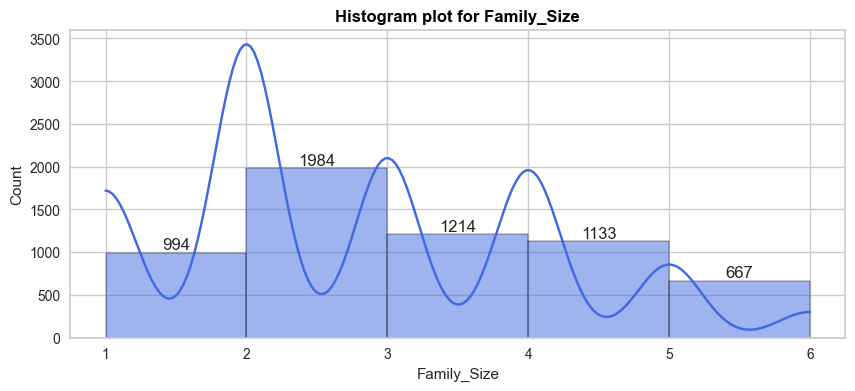

In [1425]:
# creating bins for Family_Size
c3=[1,2,3,4,5,6]

plt.subplots(figsize=(10,4))
ax=sns.histplot(data=train,x='Family_Size',bins=c3,kde=True,color='royalblue')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram plot for Family_Size',fontsize = 12, fontweight='bold', color='black')
plt.show()

Interpretation:-
* the mean is greater than standard deviation so, distribution is skewed to the `Right`.
* the customer with family size between `2-3` are more than `3-4` and `4-5`, This means maximum customer is 2 or 3 members. 

# Visualize the distribution of a Categorical variable by Countplot

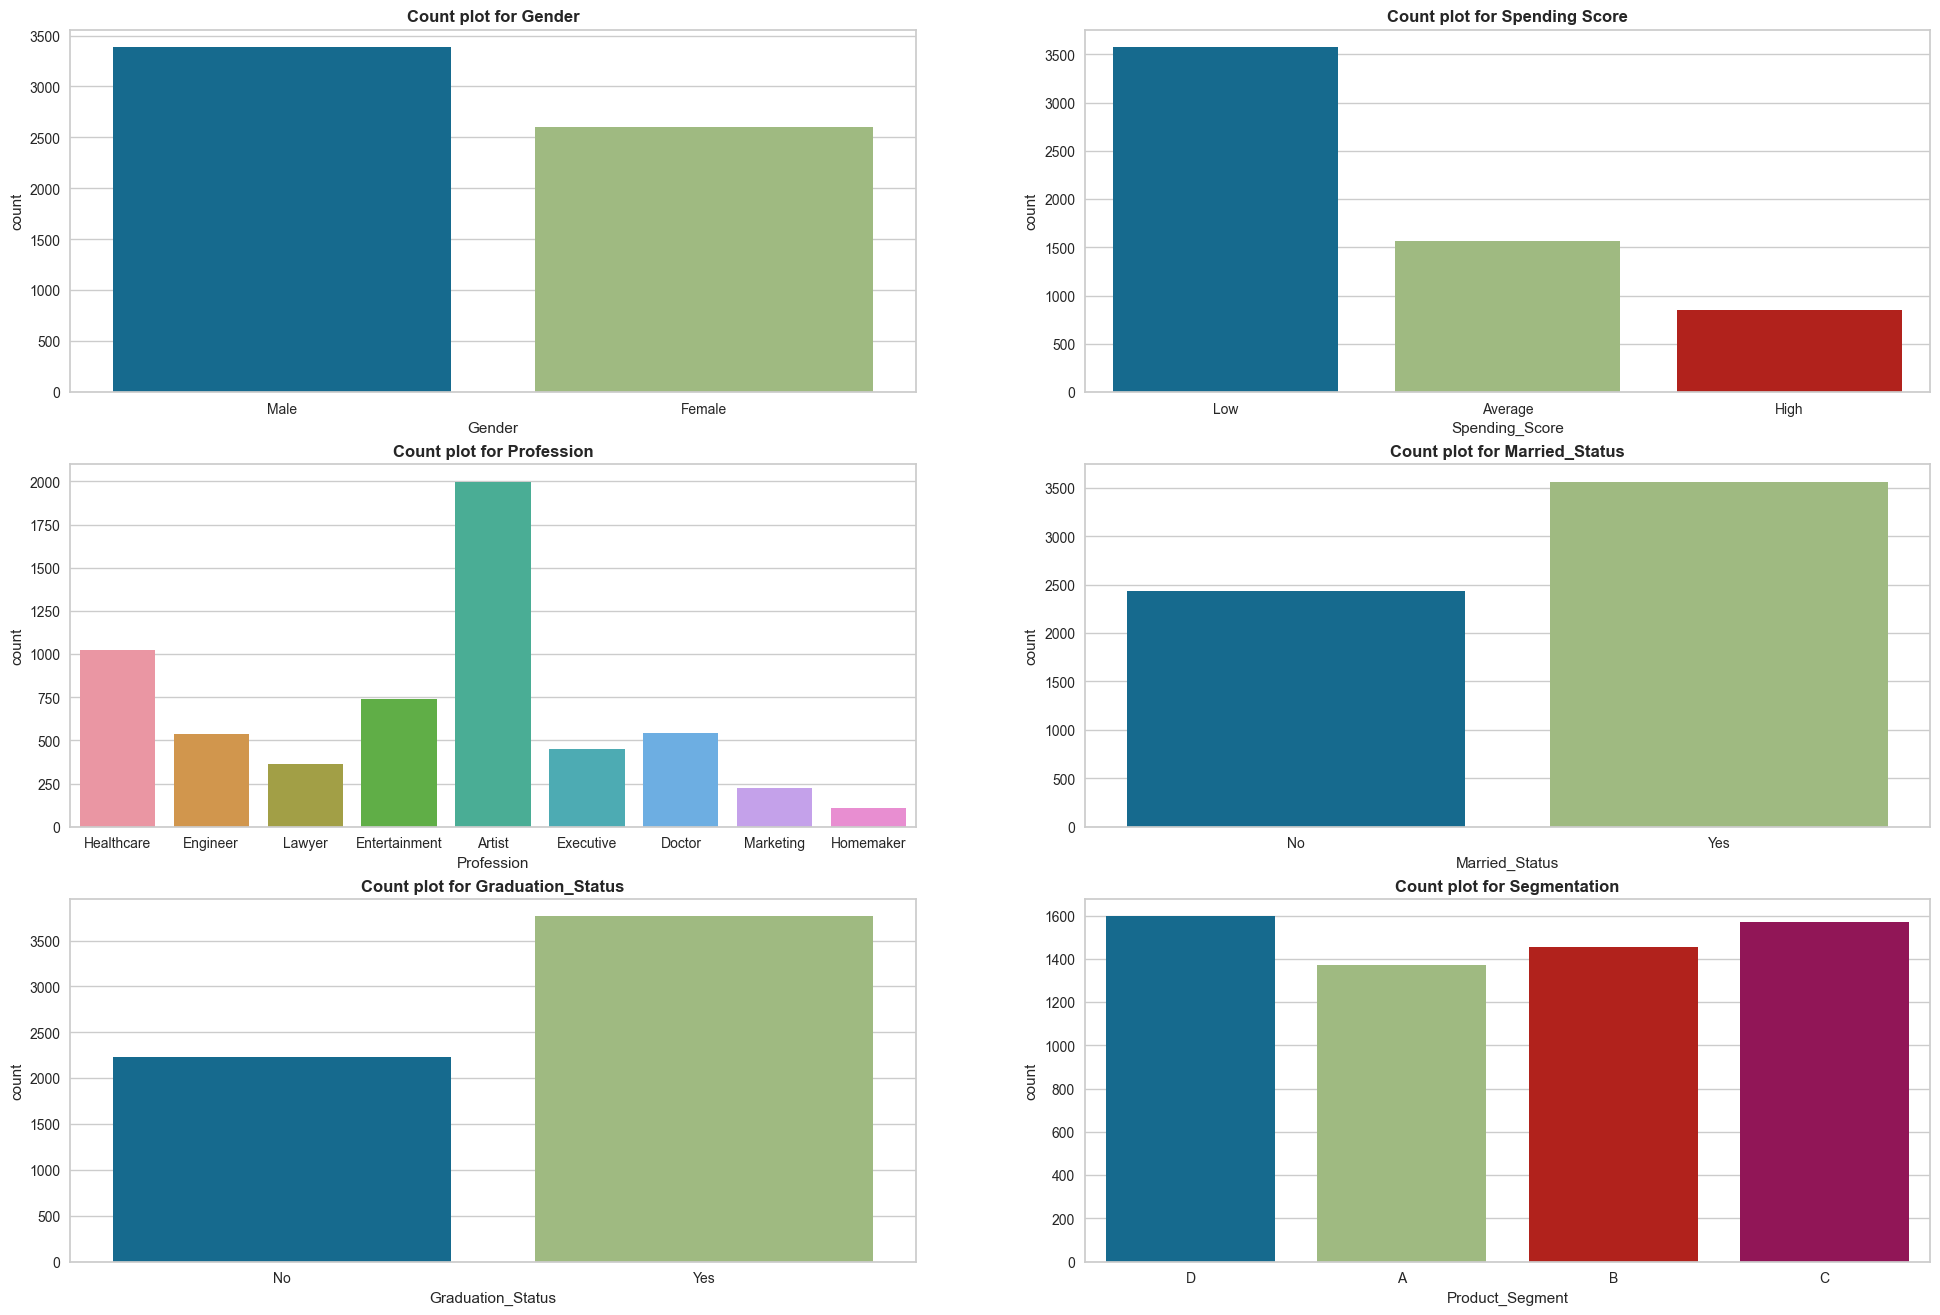

In [1426]:
# Countplots for categorical features 'Gender','Married-status','Spending-score','Profession'

plt.subplots(3,2,figsize = (24,16))
colors=["#FF7C00", "#E8000B"]

plt.subplot(321)
size = train['Gender']
sns.countplot(x=size)
plt.title('Count plot for Gender',fontweight='bold')

plt.subplot(322)
size2 = train['Spending_Score']
sns.countplot(x=size2)
plt.title('Count plot for Spending Score',fontweight='bold')

plt.subplot(323)
size3 = train['Profession']
sns.countplot(x=size3)
plt.title('Count plot for Profession',fontweight='bold')

plt.subplot(324)
size4 = train['Married_Status']
sns.countplot(x=size4)
plt.title('Count plot for Married_Status',fontweight='bold')

plt.subplot(325)
size5 = train['Graduation_Status']
sns.countplot(x=size5)
plt.title('Count plot for Graduation_Status',fontweight='bold')

plt.subplot(326)
size6 = train['Product_Segment']
sns.countplot(x=size6)
plt.title('Count plot for Segmentation',fontweight='bold')

plt.show()

Interpretation:-

 * The mostly customer `Male` to purchase our product .
 * The mostly customer spending score is `low`.
 * The mostly customer `Artist` to purchase our product .
 * The mostly customer `Married` to purchase our product .
 * The mostly customer `Graduate` to purchase our product .
 * The mostly customer purchase our Product_Segment `D` .


# Visualize the distribution to examine the relationship between variable by Scatter plot

# <p style="color:Grey;">**Age,Family Size and Gender**</p>

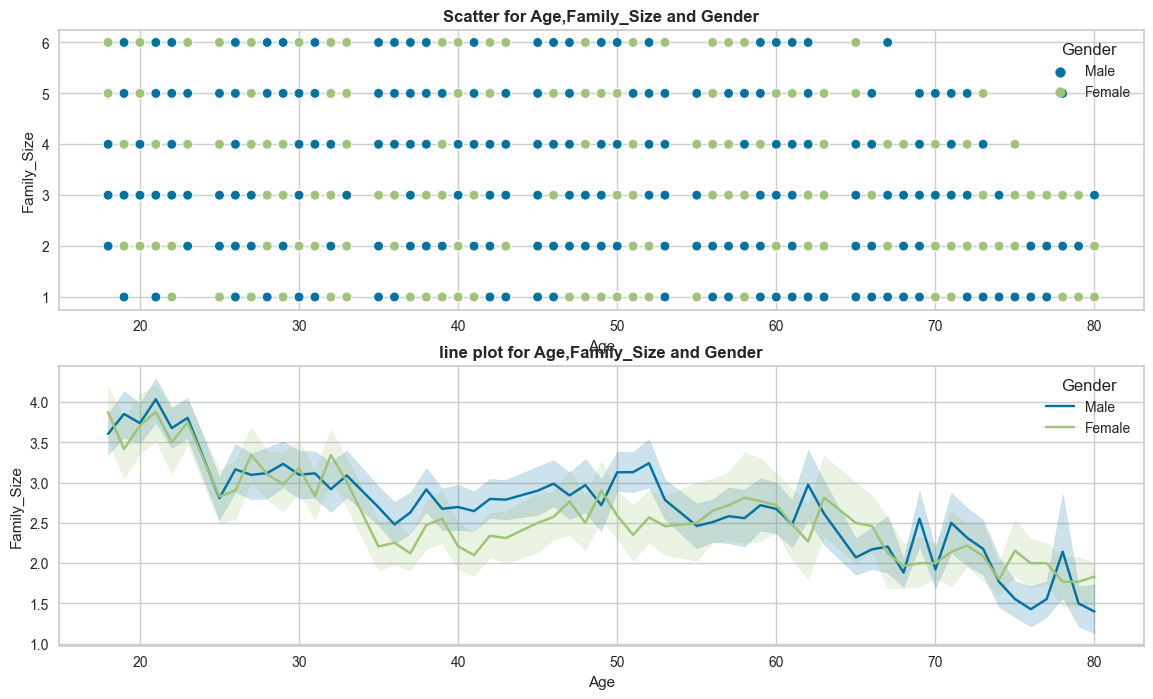

In [1427]:
plt.subplots(2,1,figsize=(14,8))

plt.subplot(211)
sns.scatterplot(data=train,x='Age',y='Family_Size',hue='Gender')
plt.title("Scatter for Age,Family_Size and Gender",fontweight='bold',size=12)

plt.subplot(212)
sns.lineplot(data=train,x='Age',y='Family_Size',hue='Gender')
plt.title("line plot for Age,Family_Size and Gender",fontweight='bold',size=12)

plt.show()

Interpretation:-
* The Family Size is more at the Age of 21 for the customer of `male` Gender.
* The Family Size is more at the Age of 21 for the customer of `Female` Gender.

# <p style="color:Grey;"> **Age,Spending Score and Gender**</p>

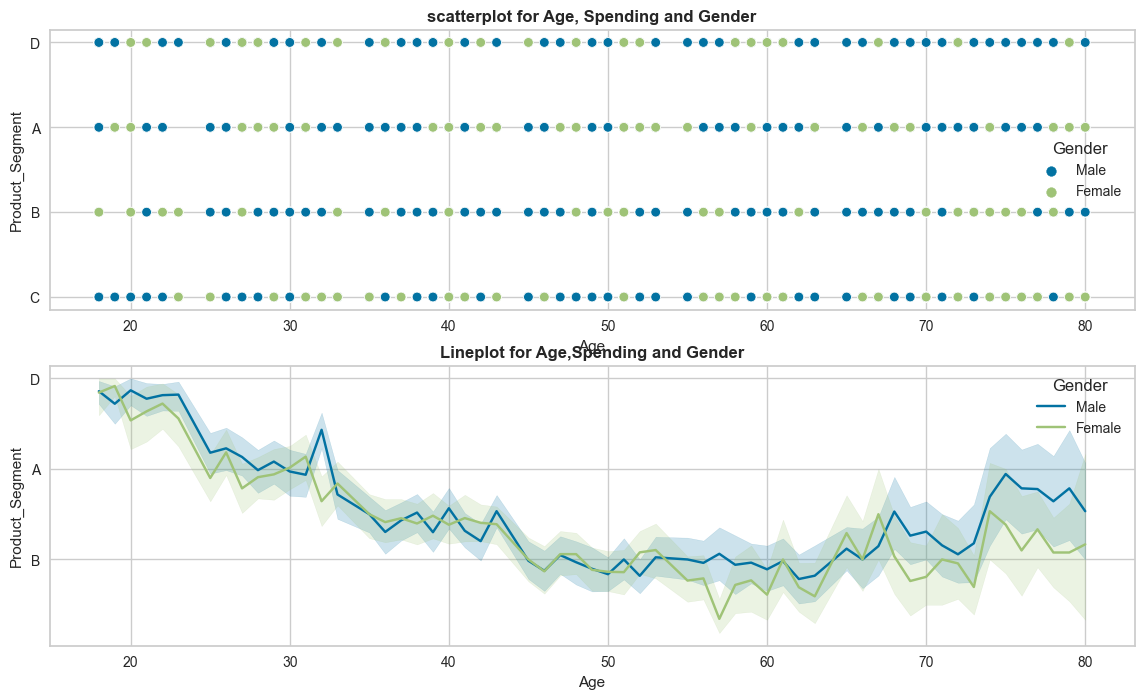

In [1428]:
plt.subplots(2,1,figsize=(14,8))

plt.subplot(211)
sns.scatterplot(data=train,x='Age',y='Product_Segment',hue='Gender')
plt.title('scatterplot for Age, Spending and Gender',fontweight='bold',size=12)

plt.subplot(212)
sns.lineplot(data=train,x='Age',y='Product_Segment',hue='Gender')
plt.title('Lineplot for Age,Spending and Gender',fontweight='bold',size=12)
plt.show()

Interpretation:-
* The Product_Segment `D` is more than at the Age of 20 for the customer of `male` Gender.
* The Product_Segment `D` is more than at the Age of 18 for the customer of `Female` Gender.

# <p style="color:Grey; font-size:40px;font-weight:bold;"> EDA CONCLUSION:</p>
Married Male Artist age group 30-40yrs with 0-2yrs Work Experience,Graduated and 2-3 Family member his spending score is low are more likely to buy `D` product_segment

<a id="8"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:110%;text-align:center;border-radius:20px 20px;">Data Analysis</p>

# <p style="color:Grey;font-weight:bold;"> Labled Encoding </p>
**Label encoding** is a technique used to convert categorical variables into numerical values. In machine learning, many algorithms require input data to be in numerical format, and label encoding is one way to accomplish this transformatio

In [1429]:
train.drop(['Product_Segment'],axis=1,inplace=True)
train=pd.get_dummies(train,drop_first=True)
train

,Age,Work_Experience,Family_Size,Gender_Male,Married_Status_Yes,Graduation_Status_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,1.0,4,1,0,0,0,0,0,0,1,0,0,0,0,1
1,38,2.6,3,0,1,1,0,1,0,0,0,0,0,0,0,0
2,67,1.0,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,67,0.0,2,1,1,1,0,0,0,0,0,0,1,0,1,0
4,40,2.6,6,0,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5,1,1,1,0,0,0,0,0,0,0,0,1,0
8064,35,3.0,4,1,0,0,0,0,0,1,0,0,0,0,0,1
8065,33,1.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4,0,0,1,0,0,0,0,1,0,0,0,0,1


# <p style="color:Grey;font-weight:bold;"> Correlation Matrix </p> 
A **correlation matrix** is a square matrix that displays the pairwise correlations between variables in a dataset. Each element in the matrix represents the correlation coefficient between two variables. The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables.

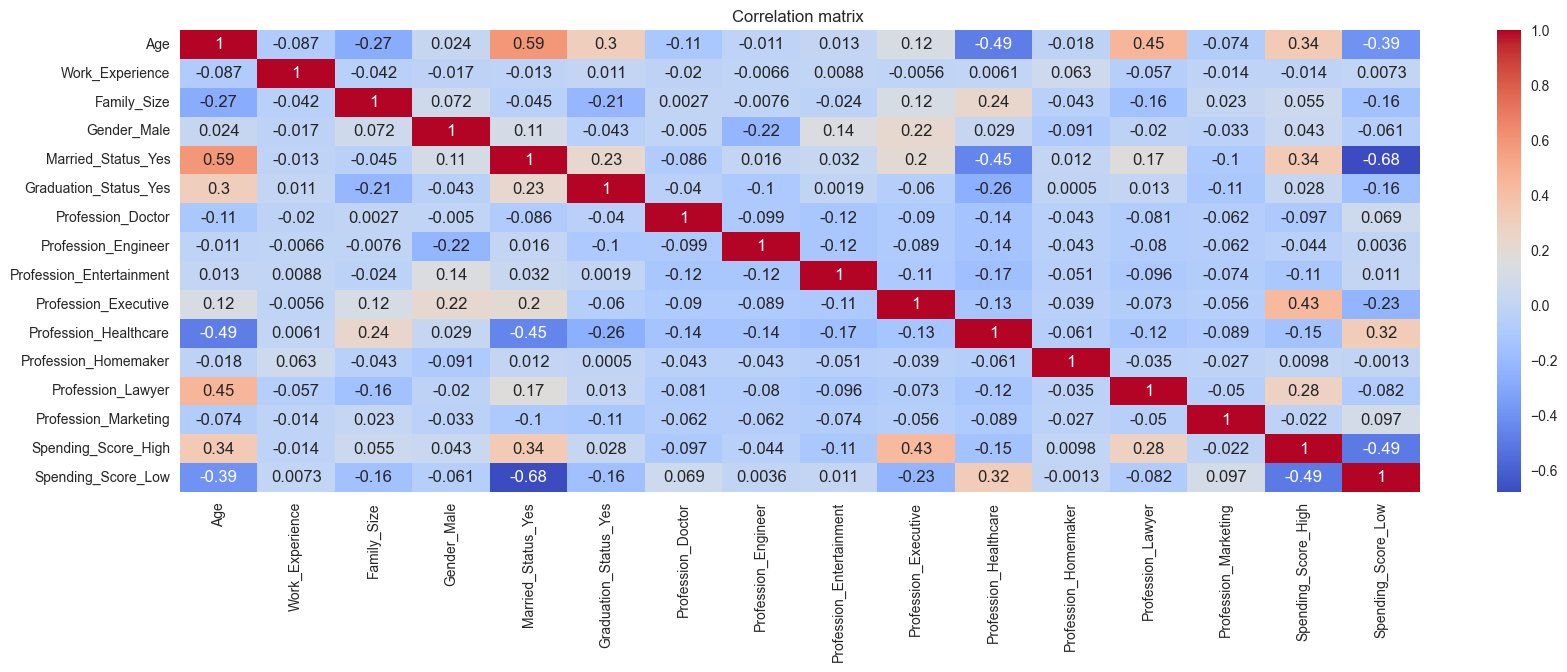

In [1430]:
# Calculate the correlation matrix
corr_matrix=train.corr()

# visualized the correlation matrix using a heatmap
plt.figure(figsize=(20,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation matrix ")
plt.show()

# <p style="color:Grey;font-weight:bold;"> Standarize the data</p>
**standardize data** means to transform it in such a way that it has zero mean and unit variance. Standardization is commonly performed before applying certain statistical techniques or machine learning algorithms to ensure that all features have a similar scale and distribution.

In [1431]:
# Standardize features using StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

<a id="9"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:110%;text-align:center;border-radius:20px 20px;">Machine Learing Model</p>

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Kmeans Clustering

# <p style="color:Grey;font-weight:bold;"> Elbow Method </p>
The **elbow method** is a technique used to determine the optimal number of clusters in unsupervised machine learning algorithms, such as k-means clustering. It gets its name from the shape of the plotted graph resembling an elbow.

Elbow Method to determine the number of clusters to be formed:


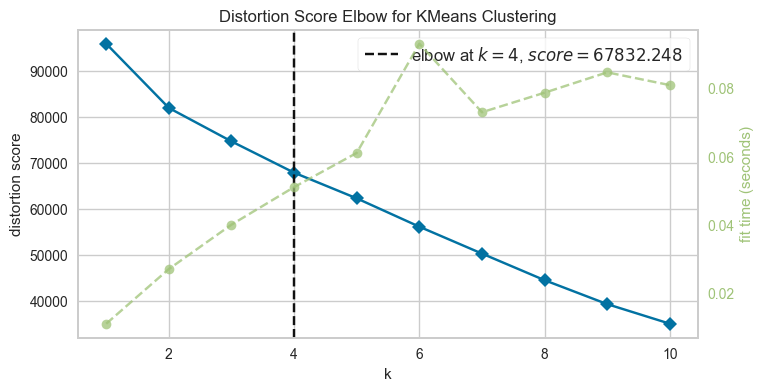

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1432]:
#finding optimum k values
wcss = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k,random_state=0)
 kmeans.fit(train_scaled)
 wcss.append(kmeans.inertia_)

# show the elbow method in graphical way
print('Elbow Method to determine the number of clusters to be formed:')
plt.figure(figsize=(8,4))
elbow_visual = KElbowVisualizer(KMeans(), k=(1,11))
elbow_visual.fit(train_scaled)
elbow_visual.show() 


# <p style="color:Grey;font-weight:bold;"> Kmeans</p>
To performed the preprocess data,we will use the K-means algorithm. This algorithm aims to partitions the data into K cluster, where each cluster with the nearest mean.

In [1433]:
# Perform the clustering with a chosen number of clusters
kmean=KMeans(n_clusters=4,random_state=0)
kmeans.fit(train_scaled)
labels=kmeans.labels_
train['Cluster'] =labels
cluster_means=train.groupby('Cluster').mean()

In [1434]:
# Explore the characteristics of each cluster
for i in range(4):
    print(f"Cluster {i}:")
    print(cluster_means.loc[i])
    print("--------------------")

Cluster 0:
Age                         43.603239
Work_Experience              1.388934
Family_Size                  2.693657
Gender_Male                  0.755735
Married_Status_Yes           0.636977
Graduation_Status_Yes        0.630229
Profession_Doctor            0.000000
Profession_Engineer          0.000000
Profession_Entertainment     1.000000
Profession_Executive         0.000000
Profession_Healthcare        0.000000
Profession_Homemaker         0.000000
Profession_Lawyer            0.000000
Profession_Marketing         0.000000
Spending_Score_High          0.039136
Spending_Score_Low           0.611336
Name: 0, dtype: float64
--------------------
Cluster 1:
Age                         42.534323
Work_Experience              1.321336
Family_Size                  2.745826
Gender_Male                  0.213358
Married_Status_Yes           0.619666
Graduation_Status_Yes        0.469388
Profession_Doctor            0.000000
Profession_Engineer          1.000000
Profession_Entertainm

<a id="10"></a>
# <p style="background-color:brown;font-family:Arial;color:white;font-size:110%;text-align:center;border-radius:20px 20px;">Conclusion</p>

# <p style="color:Grey;font-weight:bold;font-size:30px;">Cluster:0</p>
The customer in this cluster are typically `Age` around 44 years old,have 1.4Yrs `work Experience`,and 2.7 `Family-Member`.In about 75% of `male`,63% of `married` and `graduates` customers.There comes to various `profession` mostly customer is Entertainment and his `spending score` is low.

# <p style="color:Grey;font-weight:bold;font-size:30px;">Cluster:1</p>
The customer in this cluster are typically around 42 years old `Age`,have 1.3Yrs `work Experience`,and 2.7 `Family-Member`.In about 21% of `male`,61% of `married` and 46% `graduates` customers.There comes to various    `profession` mostly customer is Engineer and his `spending score` is low.

# <p style="color:Grey;font-weight:bold;font-size:30px;">Cluster:2</p>
The customer in this cluster are typically around 26 years old `Age`,have 1.4Yrs `work Experience`,and 3.5 `Family-Member`.In about 58% of `male`,5% of `married` and 31% `graduates` customers.There comes to various    `profession` mostly customer is Healthcare and his `spending score` is low.

# <p style="color:Grey;font-weight:bold;font-size:30px;">Cluster:3</p>
The customer in this cluster are typically around 50 years old `Age`,have 1.3Yrs `work Experience`,and 3.3 `Family-Member`.In about 95% of `male`,52% of `married` and 52% `graduates` customers.There comes to various    `profession` mostly customer is Executive and his `spending score` is High.

......................................................................................................................................................................................................................................................................................................................

* In this project, I performed **Unsupervised Clustering Technique** `Kmeans Algorithm`.I came up with 4 clusters and further used them in profiling customers in clusters according to their `Age,Gender,Family_Size,Education,Work_Experience and Spending_Score`. 

**If You Have Any Question Please Asked Me I Will definitely Try To Solve Your Problem In A Better Way**

# <p style="color:Red;text-align:center;font-weight:bold;font-size:60px">THE END</p>